In [4]:
import os
os.environ['PYSPARK_DRIVER_PYTHON'] = '/opt/anaconda3/bin/python3.7'
os.environ['PYSPARK_PYTHON'] = '/opt/anaconda3/bin/python3.7'
os.environ["SPARK_HOME"] = '/opt/cloudera/parcels/CDH/lib/spark'

In [5]:
import findspark
findspark.init()
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession,SQLContext, Row

In [6]:
spark = SparkSession.builder.appName("capst1chin").config("spark.sql.catalogImplementation=hive").enableHiveSupport().getOrCreate() #Singleton instance

## EDA 

In [7]:
spark.sql('use capst1chin').show()

++
||
++
++



In [52]:
spark.sql("show tables").show()

+---------+---------+-----------+
| database|tableName|isTemporary|
+---------+---------+-----------+
|capstone1|     dept|      false|
|capstone1| dept_man|      false|
|capstone1|depts_emp|      false|
|capstone1|      emp|      false|
|capstone1|   salary|      false|
|capstone1|    title|      false|
+---------+---------+-----------+



In [7]:
#1. A list showing employee number, last name, first name, sex, and salary for each employee
spark.sql("""SELECT E.emp_no, E.last_name, E.first_name, E.sex, S.salary FROM emp AS E 
          INNER JOIN salary AS S ON E.emp_no=S.emp_no""").show()

+------+----------+----------+---+------+
|emp_no| last_name|first_name|sex|salary|
+------+----------+----------+---+------+
|473302|  Zallocco|  Hideyuki|  M| 40000|
|475053| Delgrande|     Byong|  F| 53422|
| 57444|      Babb|     Berry|  F| 48973|
|421786|  Verhoeff|     Xiong|  M| 40000|
|282238|   Baumann|Abdelkader|  F| 40000|
|263976|  Cusworth|      Eran|  M| 40000|
|273487|   Parfitt| Christoph|  M| 56087|
|461591|  Samarati|    Xudong|  M| 40000|
|477657| Magliocco|    Lihong|  M| 54816|
|219881|     Speek| Kwangyoen|  F| 40000|
| 29920|     Tyugu|   Shuichi|  F| 40000|
|208153|      Lunn|   Abdulah|  M| 50183|
| 13616|     Lorho|     Perry|  F| 40000|
|246449|Bultermann|     Subbu|  F| 87084|
| 21529|  Zallocco|     Bojan|  M| 40000|
| 17934|  Wuwongse|  Bilhanan|  M| 48795|
| 48085|      Gilg|Venkatesan|  M| 63016|
|239838|     Dulli|   Naftali|  M| 57715|
|240129|    Karnin|     Roddy|  M| 43548|
|205246|    Demizu|     Nevio|  F| 80252|
+------+----------+----------+---+

In [12]:
#2. A list showing first name, last name, and hire date for employees who were hired in 1986.
spark.sql("SELECT first_name, last_name, hire_date FROM emp WHERE year(hire_date)=1986").show()

+----------+-----------+-------------------+
|first_name|  last_name|          hire_date|
+----------+-----------+-------------------+
|      Eran|   Cusworth|1986-11-14 00:00:00|
|     Bojan|   Zallocco|1986-10-14 00:00:00|
|     Nevio|     Demizu|1986-05-18 00:00:00|
|      Ziva|     Vecchi|1986-07-03 00:00:00|
|     Mohit|      Speek|1986-01-14 00:00:00|
|  Qunsheng|      Speer|1986-02-13 00:00:00|
|     Dines|Encarnacion|1986-08-02 00:00:00|
|  Harngdar|      Swick|1986-05-28 00:00:00|
|    Freyja|      Uhrig|1986-12-20 00:00:00|
|   Zhenhua|    Milicic|1986-08-04 00:00:00|
|     Bowen|   Schmezko|1986-05-30 00:00:00|
|    Reuven|      Munke|1986-04-13 00:00:00|
| Stabislas|    Domenig|1986-08-04 00:00:00|
| Juichirou|   Jumpertz|1986-09-18 00:00:00|
| Juichirou|     Ghelli|1986-12-13 00:00:00|
|    Shmuel|      Georg|1986-11-30 00:00:00|
|   Xiadong|       Bach|1986-04-29 00:00:00|
| Guangming|Butterworth|1986-10-01 00:00:00|
|     Irene|      Setia|1986-08-10 00:00:00|
|   Shuich

In [13]:
#3. A list showing the manager of each department with the following information: department number, department name, 
#the manager's employee number, last name, first name.
spark.sql("""SELECT D.dept_no, D.dept_name, E.emp_no, E.last_name, E.first_name 
FROM emp E INNER JOIN depts_emp DE ON E.emp_no=DE.emp_no INNER JOIN dept D ON DE.dept_no=D.dept_no""").show()

+-------+--------------------+------+----------+----------+
|dept_no|           dept_name|emp_no| last_name|first_name|
+-------+--------------------+------+----------+----------+
|   d002|           "Finance"|473302|  Zallocco|  Hideyuki|
|   d004|        "Production"|475053| Delgrande|     Byong|
|   d004|        "Production"| 57444|      Babb|     Berry|
|   d003|   "Human Resources"|421786|  Verhoeff|     Xiong|
|   d006|"Quality Management"|282238|   Baumann|Abdelkader|
|   d006|"Quality Management"|263976|  Cusworth|      Eran|
|   d003|   "Human Resources"|273487|   Parfitt| Christoph|
|   d002|           "Finance"|461591|  Samarati|    Xudong|
|   d006|"Quality Management"|477657| Magliocco|    Lihong|
|   d009|  "Customer Service"|219881|     Speek| Kwangyoen|
|   d004|        "Production"| 29920|     Tyugu|   Shuichi|
|   d005|       "development"|208153|      Lunn|   Abdulah|
|   d008|          "Research"| 13616|     Lorho|     Perry|
|   d005|       "development"| 13616|   

In [14]:
#4. A list showing the department of each employee with the following information: employee number, last name, first 
# name, and department name.
spark.sql('''SELECT E.emp_no, E.last_name, E.first_name, D.dept_name FROM emp E 
          INNER JOIN depts_emp DE ON E.emp_no=DE.emp_no INNER JOIN dept D ON DE.dept_no=D.dept_no''').show()

+------+----------+----------+--------------------+
|emp_no| last_name|first_name|           dept_name|
+------+----------+----------+--------------------+
|473302|  Zallocco|  Hideyuki|           "Finance"|
|475053| Delgrande|     Byong|        "Production"|
| 57444|      Babb|     Berry|        "Production"|
|421786|  Verhoeff|     Xiong|   "Human Resources"|
|282238|   Baumann|Abdelkader|"Quality Management"|
|263976|  Cusworth|      Eran|"Quality Management"|
|273487|   Parfitt| Christoph|   "Human Resources"|
|461591|  Samarati|    Xudong|           "Finance"|
|477657| Magliocco|    Lihong|"Quality Management"|
|219881|     Speek| Kwangyoen|  "Customer Service"|
| 29920|     Tyugu|   Shuichi|        "Production"|
|208153|      Lunn|   Abdulah|       "development"|
| 13616|     Lorho|     Perry|          "Research"|
| 13616|     Lorho|     Perry|       "development"|
|246449|Bultermann|     Subbu|             "Sales"|
| 21529|  Zallocco|     Bojan|       "development"|
| 17934|  Wu

In [15]:
#5. A list showing first name, last name, and sex for employees whose first name is "Hercules" and last names begin with "B.“
spark.sql('SELECT first_name, last_name, sex from emp where first_name="Hercules" and last_name LIKE "B%"').show()

+----------+-------------+---+
|first_name|    last_name|sex|
+----------+-------------+---+
|  Hercules|         Baer|  M|
|  Hercules|        Biron|  F|
|  Hercules|        Birge|  F|
|  Hercules|      Berstel|  F|
|  Hercules|    Bernatsky|  M|
|  Hercules|         Bail|  F|
|  Hercules|       Bodoff|  M|
|  Hercules|     Benantar|  F|
|  Hercules|      Basagni|  M|
|  Hercules|Bernardinello|  F|
|  Hercules|   Baranowski|  M|
|  Hercules|      Bisiani|  F|
|  Hercules|   Benzmuller|  M|
|  Hercules|         Bahr|  M|
|  Hercules|        Biran|  F|
|  Hercules|         Bain|  F|
|  Hercules|      Brendel|  F|
|  Hercules|      Buchter|  M|
|  Hercules|     Barreiro|  M|
|  Hercules|         Baak|  M|
+----------+-------------+---+



In [16]:
#6. A list showing all employees in the Sales department, including their employee number, last name, first name, and 
# department name.
spark.sql("""SELECT E.emp_no, E.last_name, E.first_name, D.dept_no, D.dept_name
FROM emp E INNER JOIN depts_emp DE ON E.emp_no=DE.emp_no INNER JOIN dept D ON DE.dept_no=D.dept_no
WHERE D.dept_name='"Sales"'""").show()

+------+-------------+----------+-------+---------+
|emp_no|    last_name|first_name|dept_no|dept_name|
+------+-------------+----------+-------+---------+
|246449|   Bultermann|     Subbu|   d007|  "Sales"|
|205246|       Demizu|     Nevio|   d007|  "Sales"|
|476443|       Asmuth|      Ziya|   d007|  "Sales"|
|424270|    Yoshizawa|    Kellyn|   d007|  "Sales"|
|280408|         Perl|   Elliott|   d007|  "Sales"|
|289261|     Nollmann|       Gad|   d007|  "Sales"|
|444985|     Verspoor|      Giap|   d007|  "Sales"|
|477628|Beutelspacher|      Duro|   d007|  "Sales"|
| 42625|        Swick|  Harngdar|   d007|  "Sales"|
| 85093|       Covnot| Nectarios|   d007|  "Sales"|
|205366|    Shimshoni|  Kazuhira|   d007|  "Sales"|
| 37601|    Naumovich|   Gilbert|   d007|  "Sales"|
|437985|        Munke|    Reuven|   d007|  "Sales"|
| 28823|     Skafidas|     Tonny|   d007|  "Sales"|
|107258|       Zaumen|    Parviz|   d007|  "Sales"|
| 11980|         Pews| Yechezkel|   d007|  "Sales"|
|457800|    

In [17]:
#7.  A list showing all employees in the Sales and Development departments, including their employee number, last name, 
# first name, and department name.
spark.sql("""SELECT E.emp_no, E.last_name, E.first_name, D.dept_name
        FROM emp E INNER JOIN depts_emp DE ON E.emp_no=DE.emp_no INNER JOIN dept D ON DE.dept_no=D.dept_no
WHERE D.dept_name IN ('"Sales"','"development"')""").show()

+------+----------+----------+-------------+
|emp_no| last_name|first_name|    dept_name|
+------+----------+----------+-------------+
|208153|      Lunn|   Abdulah|"development"|
| 13616|     Lorho|     Perry|"development"|
|246449|Bultermann|     Subbu|      "Sales"|
| 21529|  Zallocco|     Bojan|"development"|
| 17934|  Wuwongse|  Bilhanan|"development"|
|205246|    Demizu|     Nevio|      "Sales"|
|476443|    Asmuth|      Ziya|      "Sales"|
|424270| Yoshizawa|    Kellyn|      "Sales"|
| 71530|  McAlpine|Venkatesan|"development"|
|280408|      Perl|   Elliott|      "Sales"|
|104639|   Escriba|    Theron|"development"|
|214555|     Copas|   Nechama|"development"|
| 35916|    Talmon|    Wonhee|"development"|
| 61583|    Vecchi|      Ziva|"development"|
|422587|     Speek|     Mohit|"development"|
| 48885| Antonisse|     Phuoc|"development"|
|244492|    Pettit|   Shaunak|"development"|
|289261|  Nollmann|       Gad|      "Sales"|
| 26941|  Masamoto|    Shigeu|"development"|
|444985|  

In [18]:
#8.  A list showing the frequency count of employee last names, in descending order. ( i.e., how many employees share each 
# last name
spark.sql("SELECT last_name, count(last_name) cnt FROM emp GROUP BY last_name ORDER BY cnt DESC").show()

+-----------+---+
|  last_name|cnt|
+-----------+---+
|       Baba|226|
|      Coorg|223|
|     Gelosh|223|
|     Farris|222|
|    Sudbeck|222|
|     Adachi|221|
|     Osgood|220|
|    Mandell|218|
|     Masada|218|
|     Neiman|218|
|Boudaillier|217|
|    Wendorf|217|
|    Solares|216|
|     Pettis|216|
|   Cummings|216|
|     Mahnke|216|
|   Collette|215|
|    Kulisch|215|
|   Birjandi|215|
| Maksimenko|215|
+-----------+---+
only showing top 20 rows



In [19]:
#9.
spark.sql("SELECT emp_no, salary FROM salary").show()

+------+------+
|emp_no|salary|
+------+------+
| 10001| 60117|
| 10002| 65828|
| 10003| 40006|
| 10004| 40054|
| 10005| 78228|
| 10006| 40000|
| 10007| 56724|
| 10008| 46671|
| 10009| 60929|
| 10010| 72488|
| 10011| 42365|
| 10012| 40000|
| 10013| 40000|
| 10014| 46168|
| 10015| 40000|
| 10016| 70889|
| 10017| 71380|
| 10018| 55881|
| 10019| 44276|
| 10020| 40000|
+------+------+
only showing top 20 rows



In [20]:
#10. show the Average salary per title (designation)
spark.sql("""SELECT T.title,AVG(S.salary) avg_sal 
          FROM emp AS E INNER JOIN salary AS S ON E.emp_no=S.emp_no 
          INNER JOIN title AS T on E.emp_title_id=T.title_id GROUP BY T.title""").show()

+------------------+------------------+
|             title|           avg_sal|
+------------------+------------------+
|             Staff| 58465.38285033152|
|Assistant Engineer| 48564.43444730077|
|      Senior Staff| 58550.17270435993|
|   Senior Engineer| 48506.79987109579|
|          Engineer|48535.336511426336|
|           Manager|51531.041666666664|
|  Technique Leader| 48582.89609189332|
+------------------+------------------+



In [21]:
#11. Calculate employee tenure & show the tenure distribution among the employees.
max_year = spark.sql("""SELECT MAX(year(last_date)) FROM emp""") #2013
spark.sql("""SELECT e.employee_tenure, count(e.employee_tenure) cnt FROM 
            (SELECT CASE WHEN lefts=0 THEN CONCAT(CEILING(DATEDIFF('2013',hire_date)/365.25)," yrs")
            WHEN lefts=1 THEN CONCAT(CEILING(DATEDIFF(last_date,hire_date)/365.25)," yrs")
            END AS employee_tenure from emp) AS e GROUP BY e.employee_tenure ORDER BY cnt DESC""").show()

+---------------+-----+
|employee_tenure|  cnt|
+---------------+-----+
|         27 yrs|32532|
|         28 yrs|31904|
|         26 yrs|30191|
|         25 yrs|28120|
|         24 yrs|25666|
|         23 yrs|23134|
|         22 yrs|20292|
|         21 yrs|18326|
|         20 yrs|15990|
|         19 yrs|13336|
|         18 yrs|10900|
|         17 yrs| 8600|
|         16 yrs| 6049|
|         15 yrs| 3736|
|         14 yrs| 3027|
|          4 yrs| 2497|
|          5 yrs| 2485|
|         11 yrs| 2468|
|          8 yrs| 2456|
|          9 yrs| 2437|
+---------------+-----+
only showing top 20 rows



In [22]:
#12. gender-wise count by designation
spark.sql("""SELECT T.title, E.sex, COUNT(E.sex) gender_cnt 
          FROM emp AS E INNER JOIN salary AS S ON E.emp_no=S.emp_no 
          INNER JOIN title AS T on E.emp_title_id=T.title_id GROUP BY T.title, E.sex 
          ORDER BY gender_cnt DESC,T.title,E.sex""").show()

+------------------+---+----------+
|             title|sex|gender_cnt|
+------------------+---+----------+
|             Staff|  M|     64534|
|   Senior Engineer|  M|     58608|
|             Staff|  F|     42850|
|   Senior Engineer|  F|     39139|
|          Engineer|  M|     28340|
|          Engineer|  F|     18963|
|      Senior Staff|  M|     15937|
|      Senior Staff|  F|     10646|
|  Technique Leader|  M|      9041|
|  Technique Leader|  F|      6107|
|Assistant Engineer|  M|      3502|
|Assistant Engineer|  F|      2333|
|           Manager|  F|        13|
|           Manager|  M|        11|
+------------------+---+----------+



In [23]:
#13. Average salary by gender and departments
spark.sql("""SELECT D.dept_name, E.sex, AVG(salary) AS avg_salary
        FROM emp E INNER JOIN depts_emp DE ON E.emp_no=DE.emp_no INNER JOIN dept D ON DE.dept_no=D.dept_no 
        INNER JOIN salary S ON E.emp_no=S.emp_no GROUP BY D.dept_name, E.sex ORDER BY avg_salary DESC""").show()

+--------------------+---+------------------+
|           dept_name|sex|        avg_salary|
+--------------------+---+------------------+
|             "Sales"|  M| 69892.87031314708|
|             "Sales"|  F| 69740.69200153448|
|         "Marketing"|  M| 61204.98537867587|
|         "Marketing"|  F| 60930.65696155282|
|           "Finance"|  F| 59707.69166072701|
|           "Finance"|  M| 59415.24741070564|
|          "Research"|  M| 48863.00748797982|
|          "Research"|  F|48830.919777224786|
|        "Production"|  M|  48797.1590267662|
|       "development"|  M| 48714.30202725028|
|        "Production"|  F|48705.869910995294|
|       "development"|  F| 48671.85291026913|
|  "Customer Service"|  F|48094.987933954275|
|  "Customer Service"|  M| 47934.27703085197|
|"Quality Management"|  M| 46457.20392059141|
|"Quality Management"|  F| 46454.21998019312|
|   "Human Resources"|  F| 44855.58586572438|
|   "Human Resources"|  M| 44561.77219680702|
+--------------------+---+--------

In [24]:
#14. count of employees which left, avg employee tenure (in yrs) by department
spark.sql("""SELECT D.dept_name, AVG(CEILING(DATEDIFF(E.last_date,E.hire_date)/365.25)), COUNT(E.lefts) AS left_cnt
        FROM emp E INNER JOIN depts_emp DE ON E.emp_no=DE.emp_no INNER JOIN dept D ON DE.dept_no=D.dept_no 
        INNER JOIN salary S ON E.emp_no=S.emp_no WHERE E.lefts=1 GROUP BY D.dept_name ORDER BY left_cnt DESC""").show()

+--------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------+--------+
|           dept_name|avg(CEIL((CAST(CAST(datediff(CAST(last_date AS DATE), CAST(hire_date AS DATE)) AS DECIMAL(10,0)) AS DECIMAL(12,2)) / CAST(365.25 AS DECIMAL(12,2)))))|left_cnt|
+--------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------+--------+
|       "development"|                                                                                                                                               8.0112|    8508|
|        "Production"|                                                                                                                                               8.0742|    7389|
|             "Sales"|                                                                    

In [25]:
#15. No. of projects worked on by departments and designation (TOP 10)
spark.sql("""SELECT D.dept_name, T.title, COUNT(E.no_of_projects) proj_cnt
        FROM emp E INNER JOIN depts_emp DE ON E.emp_no=DE.emp_no INNER JOIN dept D ON DE.dept_no=D.dept_no 
        INNER JOIN title AS T on E.emp_title_id=T.title_id GROUP BY D.dept_name, T.title ORDER BY proj_cnt DESC""").show(10)

+------------------+---------------+--------+
|         dept_name|          title|proj_cnt|
+------------------+---------------+--------+
|     "development"|Senior Engineer|   49326|
|      "Production"|Senior Engineer|   42203|
|           "Sales"|          Staff|   41806|
|     "development"|       Engineer|   23938|
|      "Production"|       Engineer|   20416|
|       "Marketing"|          Staff|   16196|
|"Customer Service"|          Staff|   16147|
| "Human Resources"|          Staff|   14341|
|         "Finance"|          Staff|   13929|
|        "Research"|          Staff|   13494|
+------------------+---------------+--------+
only showing top 10 rows



In [26]:
#16. Last year Performance Rating of employees
spark.sql("""SELECT Last_performance_rating, count(Last_performance_rating) as cnt 
            FROM emp GROUP BY Last_performance_rating ORDER BY cnt DESC""").show()

+-----------------------+------+
|Last_performance_rating|   cnt|
+-----------------------+------+
|                      B|107154|
|                      A| 95919|
|                      C| 71304|
|                    PIP| 15105|
|                      S| 10542|
+-----------------------+------+



In [27]:
#16. Count of employees left vs not left
spark.sql("SELECT lefts, COUNT(lefts) FROM emp GROUP BY lefts").show()

+-----+------------+
|lefts|count(lefts)|
+-----+------------+
|    1|       29867|
|    0|      270157|
+-----+------------+



In [14]:
# Selecting all the required columns from all the tables for further processes:
data = spark.sql(""" SELECT E.emp_no, E.emp_title_id, DAY(E.birth_date) birth_day, MONTH(E.birth_date) birth_month, 
                YEAR(E.birth_date) birth_year, E.first_name, E.last_name, E.sex, E.no_of_projects, E.last_performance_rating, 
                E.lefts, D.dept_name, S.salary, T.title, DE.dept_no, 
                CASE WHEN lefts=0 THEN CEILING(DATEDIFF('2013',hire_date)/365.25)
                WHEN lefts=1 THEN CEILING(DATEDIFF(last_date,hire_date)/365.25)
                END AS employee_tenure
                FROM emp E LEFT JOIN depts_emp DE ON E.emp_no=DE.emp_no 
                LEFT JOIN dept D ON DE.dept_no=D.dept_no LEFT JOIN dept_man DM ON E.emp_no=DM.emp_no 
                LEFT JOIN salary S ON E.emp_no=S.emp_no
                LEFT JOIN title AS T on E.emp_title_id=T.title_id """) 

## Feature Engineering 

In [15]:
from pyspark.sql.functions import *
from pyspark.sql import functions as sf
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType
data = data.withColumnRenamed('lefts', 'left') 
data = data.withColumn('dept_name', regexp_replace('dept_name', '"', '')) #replacing names having quotes 
data = data.withColumn('Name', sf.concat(sf.col('first_name'),sf.lit('_'), sf.col('last_name'))) #concat first & last name
data = data.drop('first_name','last_name')
data = data.withColumn("employee_tenure",col("employee_tenure").cast(IntegerType())) #casting appropriate types
data = data.withColumn("salary",col("salary").cast(IntegerType()))

In [10]:
data.printSchema()

root
 |-- emp_no: integer (nullable = true)
 |-- emp_title_id: string (nullable = true)
 |-- birth_day: integer (nullable = true)
 |-- birth_month: integer (nullable = true)
 |-- birth_year: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- no_of_projects: integer (nullable = true)
 |-- last_performance_rating: string (nullable = true)
 |-- left: integer (nullable = true)
 |-- dept_name: string (nullable = true)
 |-- salary: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- dept_no: string (nullable = true)
 |-- employee_tenure: integer (nullable = true)
 |-- Name: string (nullable = true)



In [16]:
# removing duplicated records
final = data.distinct()
final.show(7, vertical = True)

-RECORD 0-------------------------------------
 emp_no                  | 244316             
 emp_title_id            | s0001              
 birth_day               | 7                  
 birth_month             | 11                 
 birth_year              | 1954               
 sex                     | M                  
 no_of_projects          | 10                 
 last_performance_rating | B                  
 left                    | 0                  
 dept_name               | Sales              
 salary                  | 82344              
 title                   | Staff              
 dept_no                 | d007               
 employee_tenure         | 27                 
 Name                    | Khun_Kuszyk        
-RECORD 1-------------------------------------
 emp_no                  | 261707             
 emp_title_id            | s0001              
 birth_day               | 1                  
 birth_month             | 5                  
 birth_year  

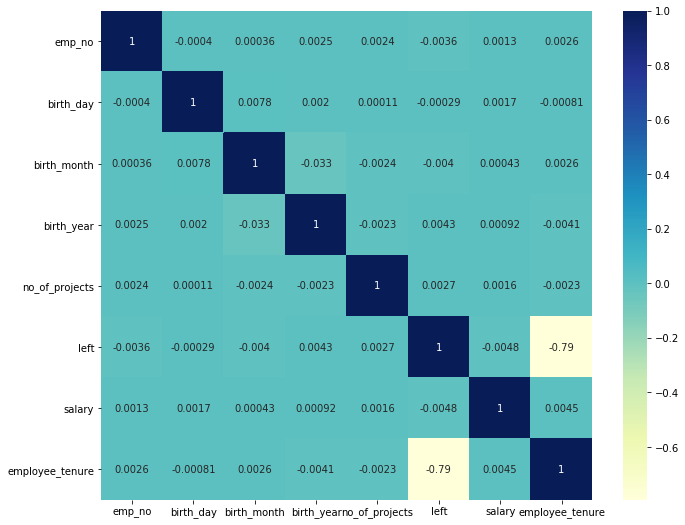

In [12]:
#Correlation Heatmap
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(11, 9))
data = final.toPandas()
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [33]:
#checking no. of null values in each column
from pyspark.sql.functions import col,isnan, when, count
import pyspark.sql.functions as F
final.agg(*[F.count(F.when(F.isnull(c), c)).alias(c) for c in final.columns]).show(vertical=True)

-RECORD 0----------------------
 emp_no                  | 0   
 emp_title_id            | 0   
 birth_day               | 0   
 birth_month             | 0   
 birth_year              | 0   
 sex                     | 0   
 no_of_projects          | 0   
 last_performance_rating | 0   
 left                    | 0   
 dept_name               | 0   
 salary                  | 0   
 title                   | 0   
 dept_no                 | 0   
 employee_tenure         | 0   
 Name                    | 0   



In [34]:
final.printSchema()

root
 |-- emp_no: integer (nullable = true)
 |-- emp_title_id: string (nullable = true)
 |-- birth_day: integer (nullable = true)
 |-- birth_month: integer (nullable = true)
 |-- birth_year: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- no_of_projects: integer (nullable = true)
 |-- last_performance_rating: string (nullable = true)
 |-- left: integer (nullable = true)
 |-- dept_name: string (nullable = true)
 |-- salary: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- dept_no: string (nullable = true)
 |-- employee_tenure: integer (nullable = true)
 |-- Name: string (nullable = true)



In [35]:
numeric_cols = ['emp_no','birth_day','birth_month','birth_year','no_of_projects','salary','employee_tenure']
categorical_cols = ['emp_title_id','sex','last_performance_rating','dept_name','title','dept_no']

In [36]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
label_indexer = StringIndexer(inputCol = 'left', outputCol = 'label')
empTitleid_indexer = StringIndexer(inputCol = 'emp_title_id', outputCol = 'empTitleid_index')
gender_indexer = StringIndexer(inputCol = 'sex', outputCol = 'sex_index')
lastperfRating_indexer = StringIndexer(inputCol = 'last_performance_rating', outputCol = 'lastperfRating_index')
deptName_indexer = StringIndexer(inputCol = 'dept_name', outputCol = 'deptName_index')
title_indexer = StringIndexer(inputCol = 'title', outputCol = 'title_index')
deptNo_indexer = StringIndexer(inputCol = 'dept_no', outputCol = 'deptNo_index')

In [37]:
assembler = VectorAssembler(
inputCols = ['empTitleid_index', 'sex_index','lastperfRating_index','deptName_index','title_index','deptNo_index']+numeric_cols,
outputCol = 'features')

## Modelling and ML Pipeline

In [39]:
(train, test) = final.randomSplit([0.7, 0.3])

In [40]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier

classifier = RandomForestClassifier(labelCol = 'label', featuresCol = 'features')
pipeline = Pipeline(stages=[empTitleid_indexer, gender_indexer, lastperfRating_indexer , deptName_indexer, title_indexer,
                            deptNo_indexer, label_indexer, assembler, classifier])
model = pipeline.fit(train)

In [41]:
predictions = model.transform(test)

In [53]:
predictions.show(vertical = True)

-RECORD 0---------------------------------------
 emp_no                  | 10284                
 emp_title_id            | e0002                
 birth_day               | 8                    
 birth_month             | 4                    
 birth_year              | 1954                 
 sex                     | F                    
 no_of_projects          | 6                    
 last_performance_rating | C                    
 left                    | 0                    
 dept_name               | Production           
 salary                  | 40000                
 title                   | Engineer             
 dept_no                 | d004                 
 employee_tenure         | 16                   
 Name                    | Masali_Murrill       
 empTitleid_index        | 2.0                  
 sex_index               | 1.0                  
 lastperfRating_index    | 2.0                  
 deptName_index          | 1.0                  
 title_index        

In [44]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
eval_accuracy = (MulticlassClassificationEvaluator
                   (labelCol="label", predictionCol="prediction", metricName="accuracy"))
accuracy = eval_accuracy.evaluate(predictions)

eval_precision = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="weightedPrecision"))
precision =  eval_precision.evaluate(predictions)

eval_recall = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="weightedRecall"))
recall =  eval_recall.evaluate(predictions)  

eval_f1 = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="f1"))
f1 =  eval_f1.evaluate(predictions)

In [49]:
print(f"""
      Accuracy  = {accuracy}
      Error     = {1-accuracy}
      Precision = {precision}
      Recall    = {recall}
      F1        = {f1}""")


      Accuracy  = 0.9956020900159374
      Error     = 0.004397909984062642
      Precision = 0.9956958121088637
      Recall    = 0.9956020900159375
      F1        = 0.9956286601095841


In [50]:
# Area Under the Curve
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
auroc = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})
auroc

0.9997539496982505

In [51]:
model.save("capstone1_rfclassifier.model")